<a href="https://colab.research.google.com/github/faisalimroz/Big-Data-and-IoT-Lab-Faisal/blob/main/labev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/cars.csv')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
df[['brand', 'fuel', 'owner']]

,brand,fuel,owner
0,Maruti,Diesel,First Owner
1,Skoda,Diesel,Second Owner
2,Honda,Petrol,Third Owner
3,Hyundai,Diesel,First Owner
4,Maruti,Petrol,First Owner
...,...,...,...
8123,Hyundai,Petrol,First Owner
8124,Hyundai,Diesel,Fourth & Above Owner
8125,Maruti,Diesel,First Owner
8126,Tata,Diesel,First Owner


In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(
    categories=[['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
                 'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
                 'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
                 'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
                 'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'], ['Diesel', 'Petrol', 'LPG', 'CNG'], ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']])
df[['brand', 'fuel', 'owner']] = oe.fit_transform(
    df[['brand', 'fuel', 'owner']])

In [ ]:
oe.categories_

[array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
       dtype=object),
 array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object)]

In [ ]:
df[['brand', 'fuel', 'owner']]

,brand,fuel,owner
0,0.0,0.0,0.0
1,1.0,0.0,1.0
2,2.0,1.0,2.0
3,3.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
8123,3.0,1.0,0.0
8124,3.0,0.0,3.0
8125,0.0,0.0,0.0
8126,8.0,0.0,0.0


In [ ]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,0.0,450000
1,1.0,120000,0.0,1.0,370000
2,2.0,140000,1.0,2.0,158000
3,3.0,127000,0.0,0.0,225000
4,0.0,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,3.0,110000,1.0,0.0,320000
8124,3.0,119000,0.0,3.0,135000
8125,0.0,120000,0.0,0.0,382000
8126,8.0,25000,0.0,0.0,290000


In [ ]:
Outlier Handling


<Axes: xlabel='km_driven'>

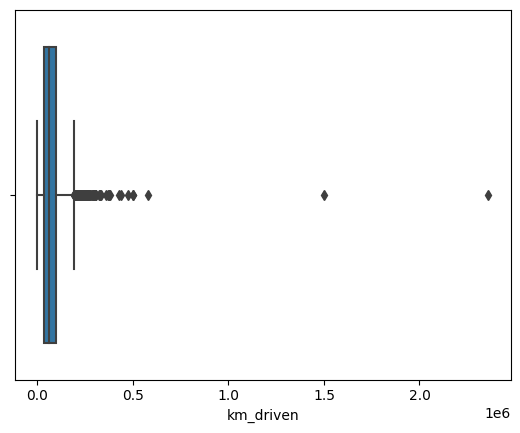

In [ ]:
sns.boxplot(data=df, x="km_driven")

In [ ]:
print("Std value of cgpa", df['km_driven'].std())
print("Min value of cgpa", df['km_driven'].min())
print("Max value of cgpa", df['km_driven'].max())

Std value of cgpa 56550.554958219196
Min value of cgpa 1
Max value of cgpa 2360457


In [ ]:
upper_limit = df['km_driven'].mean() + 3*df['km_driven'].std()
lower_limit = df['km_driven'].mean() - 3*df['km_driven'].std()

In [ ]:
outlier = df[(df['km_driven'] > upper_limit) | (df['km_driven'] < lower_limit)]
new_df = df[(df['km_driven'] < upper_limit) & (df['km_driven'] > lower_limit)]

In [ ]:
new_df.shape

(8056, 5)

In [ ]:
scalling

In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((5689, 4), (2439, 4))

In [ ]:
sc.mean_

array([4.66695374e+00, 6.98195108e+04, 4.77116142e-01, 4.62229331e-01])

In [ ]:
X_train

,brand,km_driven,fuel,owner
2246,9.0,50000,1.0,0.0
2095,9.0,120000,0.0,1.0
3290,3.0,60000,1.0,0.0
6868,0.0,5000,1.0,0.0
6895,7.0,40000,0.0,0.0
...,...,...,...,...
7935,0.0,100000,1.0,2.0
5192,3.0,152000,0.0,0.0
3980,3.0,70000,1.0,0.0
235,0.0,110000,0.0,1.0
